# Importing Libraries

In [76]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
from sklearn.metrics import mean_squared_error, mean_absolute_error
rcParams['figure.figsize'] = 10, 6
import math

# Loading Dataset

In [77]:
df = pd.read_csv("Bitcoins.csv")
print(df)

           Date      Price       Open       High        Low     Vol. Change %
0      1-Jan-12        5.3        4.7        5.5        4.6  108.51K   11.65%
1      2-Jan-12        5.2        5.3        5.5        4.8   69.15K   -0.95%
2      3-Jan-12        4.9        5.2        5.3        4.7  125.17K   -6.51%
3      4-Jan-12        5.6        4.9        5.7        4.8  131.17K   14.14%
4      5-Jan-12        6.9        5.6        7.2        5.6  182.33K   24.78%
...         ...        ...        ...        ...        ...      ...      ...
4044  27-Jan-23  23,074.60  23,016.00  23,480.30  22,602.90  310.36K    0.25%
4045  28-Jan-23  23,027.90  23,074.60  23,182.30  22,889.80  156.96K   -0.20%
4046  29-Jan-23  23,753.10  23,023.50  23,952.90  22,973.30  320.86K    3.15%
4047  30-Jan-23  22,832.20  23,746.00  23,794.00  22,560.00  339.62K   -3.88%
4048  31-Jan-23  23,125.10  22,832.20  23,262.90  22,724.90  289.38K    1.28%

[4049 rows x 7 columns]


# Data Preprosessing and Cleaning

## Replacing values

In [78]:
df['Price'] = df['Price'].str.replace(',', '').astype(float)

## Checking for null Values

In [79]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

# Visualizing the Price Distrubution over time

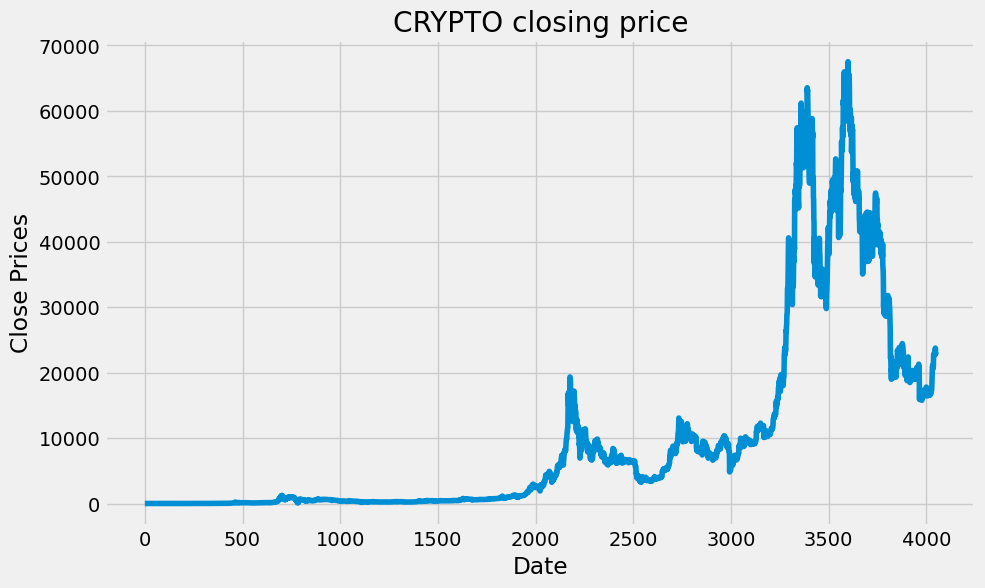

In [80]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Price'])
plt.title('CRYPTO closing price')
plt.show()

# Rolling Mean and Standard Deviation

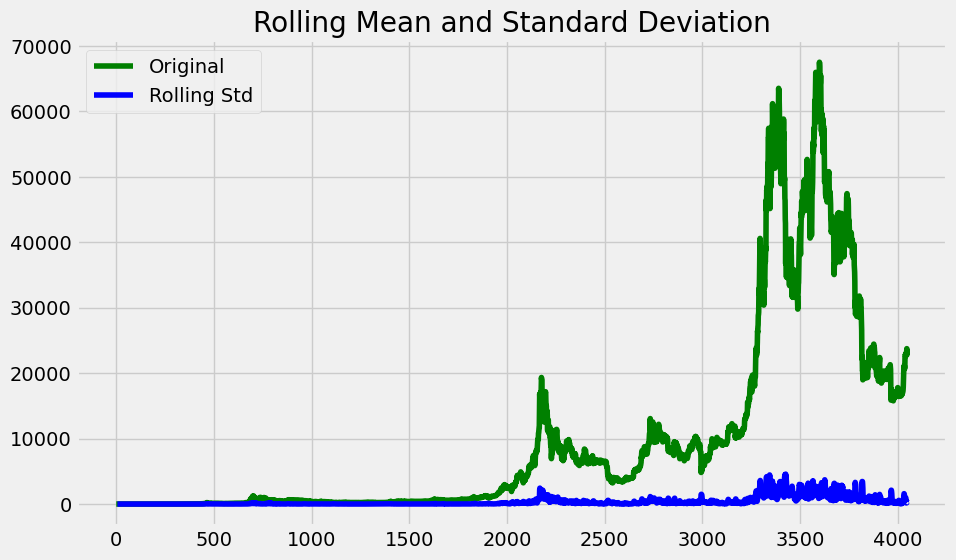

In [81]:
rolstd = df['Price'].rolling(7).std()
plt.plot(df['Price'], color='green',label='Original')
plt.plot(rolstd, color='blue', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

# Calculating Inequality Measures

## Lorenz Curve

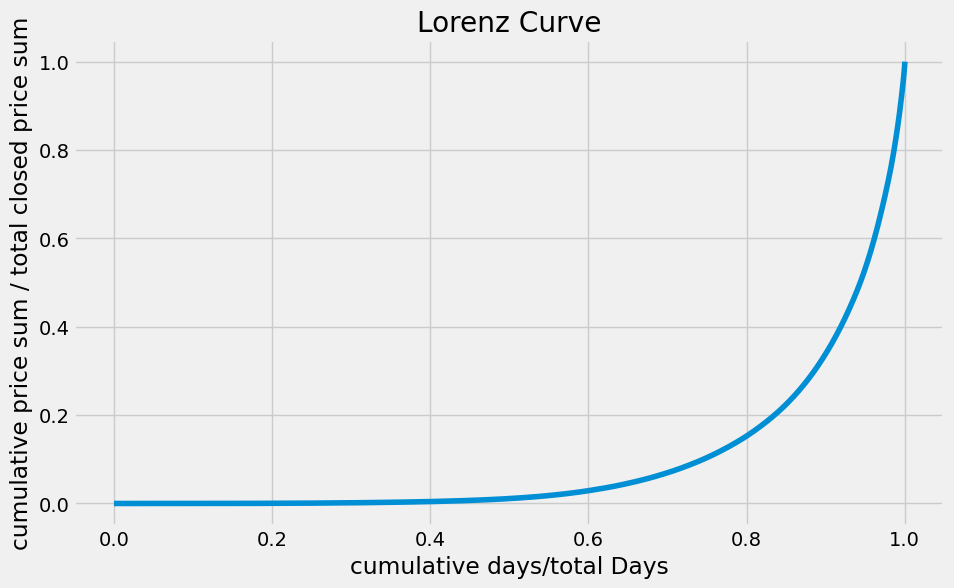

In [82]:
Closed_price= df['Price']
Close_price=[];
Closed_diff =[]


'''  

difference between closed prices of two days  

'''
for i in range((len(Closed_price)-1)):
    j=abs(Closed_price[i+1] - Closed_price[i])
    Closed_diff.append(j)
kval=[]
j =0
for i in Closed_price:
    Close_price.append(i)
for i in range(0,len(Close_price),1 ):
        lis=Closed_diff[:i]       
        kval.append(lis)
        j =i

    
'''  

lorenz curve

'''


sum1 =0;
total_sum =0;
y_axis=[]
for i in Closed_diff:
    total_sum+= i;
    
    
    
Closed_diff.sort()
y_axis=[]


n = len(Closed_diff)
x_axis=[]
count=0
for  i in Closed_diff:
    sum1+= i
    count+=1
    y_axis.append(sum1/total_sum);
    x_axis.append(count/n);
plt.title("Lorenz Curve");
plt.xlabel('cumulative days/total Days')
plt.ylabel('cumulative price sum / total closed price sum')
plt.plot(x_axis,y_axis)

## Calcuating Gini Index and K-Value

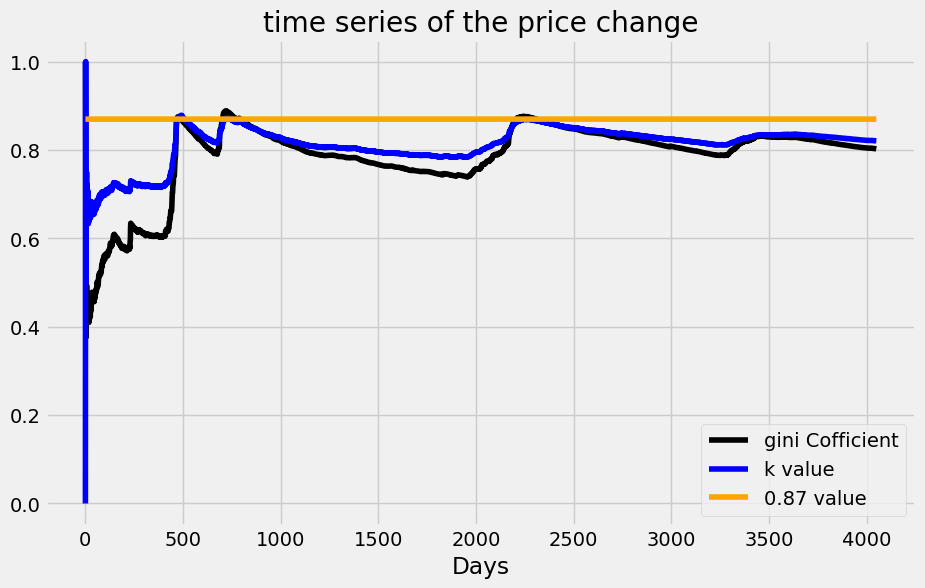

In [83]:
ginilis=[]
kvlist=[]
lenval=[]
val87=[]
count=0

def lorenz(x):
    y_axis=[]
    x.sort()
    n = len(x)
    x_axis=[]
    count=0
    sum1 =0
    total_sum =0;
    for i in x:
        total_sum+= i;
    for  i in x:
        sum1+= i
        count+=1
        y_axis.append(sum1/total_sum);
        x_axis.append(count/n);
    return x_axis,y_axis
def kv(x):
    diff=[]
    value=0
    x_axis1 , y_axis1 = lorenz(x);
    for i in range(len(x)):
        d=(1-x_axis1[i]) - y_axis1[i] 
        if(d < 0 ):
            value= (x_axis1[i-1] + x_axis1[i])/2
            break;
        diff.append(d)
    return value;
    
def gini(x):
    sum2 =0
    x_axis1 , y_axis1 = lorenz(x);
    for i in range(len(x)-1):
        sum2 = sum2+((( y_axis1[i+1]+  y_axis1[i] )/2)*(x_axis1[i+1]-x_axis1[i]))
    ginival =1- (2 * sum2)
    return ginival
for i in kval:
    count +=1
    ginilis.append(gini(i))
    kvlist.append(kv(i))
    val87.append(0.87)
    lenval.append(count)

df['Gini'] = ginilis
df['Kvalue']= kvlist
df.to_csv("Bitcoin.csv", index=False)
plt.xlabel('Days')
plt.plot(lenval,ginilis,color="Black",label="gini Cofficient")
plt.plot(lenval,kvlist,color="Blue",label="k value")
plt.plot(lenval,val87,color="orange",label="0.87 value")
plt.legend(loc='best')
plt.title("time series of the price change")
plt.show(block=False)

# Machine Learning

# Data Preprosessing and Cleaning

## Replacing Values

In [84]:
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

In [86]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %    float64
Gini        float64
Kvalue      float64
dtype: object

## Calculation of Statistcial Measures over price distibution

In [87]:
ar=[]
path ="Bitcoin.csv"
def skewness(df,path):
    x = df['Price'].rolling(window=5).skew()
    x=x.tolist()
    x=x[4:]+x[:4]
    return x
def standard(df,path):
    sma = df['Price'].rolling(window=5).std()
    sma=sma.tolist()
    sma=sma[4:]+sma[:4]
    return sma;
def kuritosis(df,path):
    y =df['Price'].rolling(window=5).kurt()
    y=y.tolist()
    y=y[4:]+y[:4]
    df["Kurtosis"] = y
    return y;
    
standard(df,path)
skewness(df,path)
kuritosis(df,path)
Dict = {"Skewness": skewness(df,path), "Standard_Deviation": standard(df,path), "Kurtosis": kuritosis(df,path)}

In [88]:
df11=pd.DataFrame.from_dict(Dict)

## Checking for null Values

In [89]:
df11.isnull().sum()

Skewness              12
Standard_Deviation     4
Kurtosis              12
dtype: int64

In [106]:
df =df.drop(['Vol.'] ,axis = 1)
df.dtypes

Date                   object
Price                 float64
Open                  float64
High                  float64
Low                   float64
Change %              float64
Gini                  float64
Kvalue                float64
Kurtosis              float64
Standard_Deviation    float64
Skewness              float64
dtype: object

##  Replacing the null values Using Knn imputer

In [107]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df11),columns = df11.columns)

In [108]:
df['Standard_Deviation']=df2['Standard_Deviation']
df['Skewness']=df2['Skewness']
df['Kurtosis']=df2['Kurtosis']
df.to_csv("Bitcoin.csv",index='Date')

In [126]:
df1 = df
df1[:3]

,Date,Price,Open,High,Low,Change %,Gini,Kvalue,Kurtosis,Standard_Deviation,Skewness
0,1-Jan-12,5.3,4.7,5.5,4.6,11.65,1.000,0.00,-8.423083,0.779102,1.682097
1,2-Jan-12,5.2,5.3,5.5,4.8,-0.95,1.000,1.00,-98.498489,0.896103,0.304531
2,3-Jan-12,4.9,5.2,5.3,4.7,-6.51,0.375,0.75,56.907353,0.887130,-0.917914


# Rearranging Features

In [127]:
cols = df1.columns.tolist()
cols=cols[0:1]+cols[2:]+cols[1:2]
df1 = df1[cols]
df1[:3]

,Date,Open,High,Low,Change %,Gini,Kvalue,Kurtosis,Standard_Deviation,Skewness,Price
0,1-Jan-12,4.7,5.5,4.6,11.65,1.000,0.00,-8.423083,0.779102,1.682097,5.3
1,2-Jan-12,5.3,5.5,4.8,-0.95,1.000,1.00,-98.498489,0.896103,0.304531,5.2
2,3-Jan-12,5.2,5.3,4.7,-6.51,0.375,0.75,56.907353,0.887130,-0.917914,4.9


## Splitting Data as Traing and Testing DataFrames

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
train=df1.iloc[:3800]
test=df1.iloc[3801:]

x_train = train.iloc[:, 1:10]
y_train = train.iloc[:, 10:]
x_test = test.iloc[:, 1:10]
y_test = test.iloc[:, 10:]

In [131]:
y_test

,Price
3801,29465.2
3802,31723.3
3803,31793.4
3804,29798.5
3805,30455.5
...,...
4044,23074.6
4045,23027.9
4046,23753.1
4047,22832.2


## Models Prediction and Testing

## Random Forest Regressor

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train.values.ravel())
y_pred = regressor.predict(x_test)
e_dataframe = pd.DataFrame(y_pred)
d=r2_score(y_test,e_dataframe)
print("Random Forest Regressor - r2 Score Value:",d)

Random Forest Regressor r2 Score Value: 0.9390222397370713


In [133]:
c=mean_squared_error(y_test,y_pred)  
print(c)

662238.7382870744


In [134]:
arr = y_test['Price'].to_numpy()
dic={"ytest": arr, "ypred" : y_pred}
df00=pd.DataFrame.from_dict(dic)
df00

,ytest,ypred
0,29465.2,29320.849
1,31723.3,30804.182
2,31793.4,31334.344
3,29798.5,30220.653
4,30455.5,30443.738
...,...,...
243,23074.6,23325.238
244,23027.9,23374.891
245,23753.1,23493.370
246,22832.2,23315.253


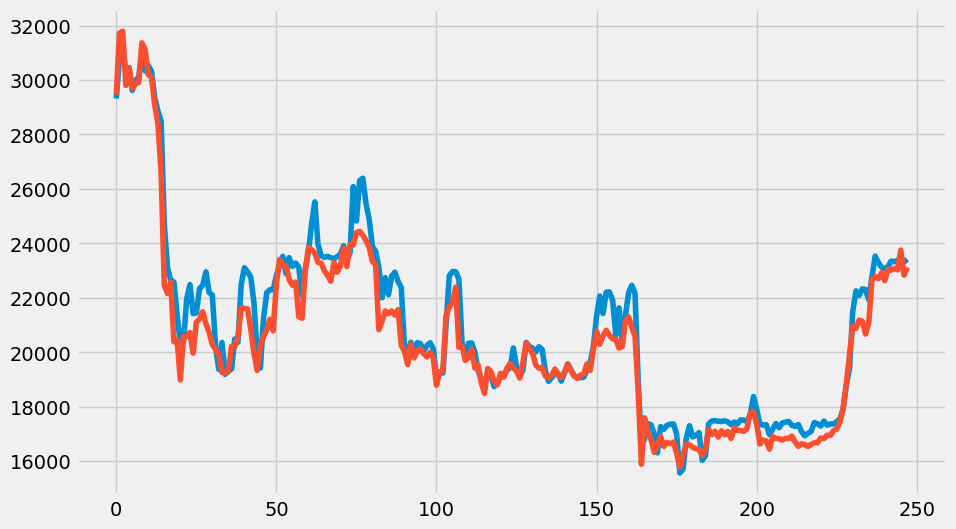

In [135]:
plt.plot(y_pred, label="RandomForest")
plt.plot(arr)
# blue line is predicted & red is actual data.

# Linear Regressor

In [137]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print("Linear Regressor -R2 Score:", r2_score(y_test,y_pred))

Linear Regressor -R2 Score: 0.9918856764957011


In [138]:
c=mean_squared_error(y_test,y_pred)
c

88124.24950292762

In [139]:
arr = y_test['Price'].to_numpy()
arr1 =[]
for i in  y_pred:
    arr1.append(i[0])


In [140]:
dic={"ytest": arr, "ypred" : arr1}
df00=pd.DataFrame.from_dict(dic)
df00

,ytest,ypred
0,29465.2,29241.418982
1,31723.3,31664.546326
2,31793.4,31825.876076
3,29798.5,30282.871674
4,30455.5,30270.982566
...,...,...
243,23074.6,23046.140261
244,23027.9,22924.506827
245,23753.1,23699.123164
246,22832.2,22916.446693


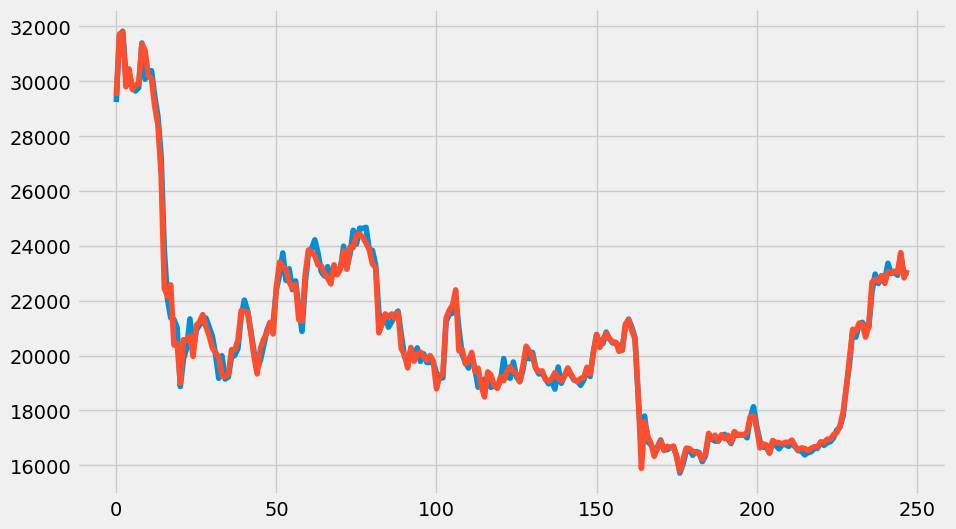

In [141]:
plt.plot(arr1)
plt.plot(arr, label="LinearRegressor")